<a href="https://colab.research.google.com/github/kaika02/k-nearest-neighbor/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Import Dataset**

In [2]:
customer = pd.read_csv('data_customer.csv')

In [3]:
customer.head()

,Age,Gender,Payment Method,Future Customer
0,44,male,1,1
1,86,female,1,0
2,17,female,1,1
3,57,female,1,0
4,48,female,1,0



*   Payment Method

> 1 = credit card

> 2 = cheque

> 3 = cash

*   Future Customer

> 0 = No

> 1 = Yes

In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              500 non-null    int64 
 1   Gender           500 non-null    object
 2   Payment Method   500 non-null    int64 
 3   Future Customer  500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [5]:
X = customer.iloc[:,[0,2]].values
y = customer.iloc[:, -1].values

In [6]:
X

array([[44,  1],
       [86,  1],
       [17,  1],
       [57,  1],
       [48,  1],
       [39,  1],
       [78,  1],
       [38,  1],
       [80,  2],
       [33,  1],
       [54,  1],
       [53,  3],
       [63,  3],
       [91,  3],
       [17,  1],
       [22,  1],
       [17,  1],
       [57,  1],
       [25,  1],
       [50,  1],
       [46,  3],
       [28,  1],
       [40,  1],
       [63,  3],
       [48,  2],
       [20,  1],
       [56,  1],
       [23,  1],
       [57,  1],
       [24,  1],
       [55,  1],
       [42,  1],
       [22,  3],
       [58,  1],
       [90,  1],
       [45,  3],
       [35,  1],
       [58,  1],
       [49,  1],
       [27,  2],
       [20,  1],
       [51,  3],
       [19,  1],
       [39,  1],
       [47,  3],
       [30,  2],
       [47,  1],
       [21,  1],
       [73,  2],
       [25,  2],
       [33,  1],
       [39,  3],
       [42,  3],
       [34,  1],
       [62,  1],
       [37,  3],
       [24,  3],
       [25,  3],
       [39,  2

In [7]:
y

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,

**Splitting the dataset into the Training set and Test set**

Data yang digunakan untuk Test yaitu sebesar 25% atau sekitar 125 data.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
X_train

array([[62,  1],
       [57,  1],
       [50,  1],
       [26,  1],
       [34,  3],
       [85,  1],
       [21,  1],
       [35,  1],
       [37,  3],
       [47,  3],
       [40,  1],
       [77,  1],
       [21,  1],
       [35,  3],
       [46,  3],
       [48,  3],
       [42,  3],
       [64,  3],
       [56,  1],
       [45,  3],
       [48,  1],
       [56,  3],
       [31,  1],
       [53,  2],
       [39,  1],
       [80,  2],
       [61,  1],
       [23,  1],
       [46,  2],
       [43,  1],
       [40,  1],
       [39,  1],
       [46,  3],
       [46,  1],
       [17,  1],
       [29,  1],
       [37,  1],
       [47,  3],
       [45,  3],
       [84,  1],
       [50,  1],
       [43,  3],
       [26,  1],
       [64,  1],
       [32,  1],
       [36,  3],
       [23,  3],
       [33,  1],
       [56,  1],
       [72,  1],
       [21,  2],
       [52,  1],
       [39,  3],
       [25,  1],
       [39,  1],
       [80,  3],
       [31,  1],
       [33,  2],
       [27,  3

In [10]:
X_test

array([[76,  3],
       [22,  1],
       [50,  3],
       [37,  1],
       [56,  2],
       [22,  1],
       [53,  1],
       [17,  3],
       [44,  1],
       [68,  1],
       [20,  1],
       [75,  2],
       [75,  1],
       [60,  1],
       [72,  3],
       [49,  1],
       [32,  1],
       [40,  1],
       [51,  1],
       [58,  1],
       [82,  1],
       [27,  1],
       [52,  1],
       [39,  1],
       [30,  2],
       [50,  3],
       [28,  1],
       [54,  1],
       [19,  3],
       [30,  3],
       [39,  1],
       [61,  3],
       [52,  2],
       [22,  1],
       [90,  1],
       [37,  1],
       [22,  3],
       [22,  1],
       [24,  2],
       [38,  1],
       [22,  1],
       [47,  1],
       [61,  1],
       [48,  1],
       [79,  1],
       [86,  1],
       [69,  1],
       [69,  3],
       [30,  3],
       [91,  1],
       [41,  2],
       [64,  3],
       [70,  1],
       [25,  1],
       [31,  2],
       [63,  3],
       [62,  1],
       [45,  1],
       [38,  3

In [11]:
y_train

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,

In [12]:
y_test

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

**Feature Scaling**

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train

array([[ 1.01415877e+00, -7.23218445e-01],
       [ 7.31904400e-01, -7.23218445e-01],
       [ 3.36748281e-01, -7.23218445e-01],
       [-1.01807270e+00, -7.23218445e-01],
       [-5.66465705e-01,  1.52746136e+00],
       [ 2.31252888e+00, -7.23218445e-01],
       [-1.30032707e+00, -7.23218445e-01],
       [-5.10014831e-01, -7.23218445e-01],
       [-3.97113083e-01,  1.52746136e+00],
       [ 1.67395659e-01,  1.52746136e+00],
       [-2.27760460e-01, -7.23218445e-01],
       [ 1.86092188e+00, -7.23218445e-01],
       [-1.30032707e+00, -7.23218445e-01],
       [-5.10014831e-01,  1.52746136e+00],
       [ 1.10944785e-01,  1.52746136e+00],
       [ 2.23846533e-01,  1.52746136e+00],
       [-1.14858712e-01,  1.52746136e+00],
       [ 1.12706052e+00,  1.52746136e+00],
       [ 6.75453526e-01, -7.23218445e-01],
       [ 5.44939105e-02,  1.52746136e+00],
       [ 2.23846533e-01, -7.23218445e-01],
       [ 6.75453526e-01,  1.52746136e+00],
       [-7.35818328e-01, -7.23218445e-01],
       [ 5.

In [15]:
X_test

array([[ 1.80447101e+00,  1.52746136e+00],
       [-1.24387619e+00, -7.23218445e-01],
       [ 3.36748281e-01,  1.52746136e+00],
       [-3.97113083e-01, -7.23218445e-01],
       [ 6.75453526e-01,  4.02121459e-01],
       [-1.24387619e+00, -7.23218445e-01],
       [ 5.06100904e-01, -7.23218445e-01],
       [-1.52613057e+00,  1.52746136e+00],
       [-1.95696364e-03, -7.23218445e-01],
       [ 1.35286402e+00, -7.23218445e-01],
       [-1.35677794e+00, -7.23218445e-01],
       [ 1.74802013e+00,  4.02121459e-01],
       [ 1.74802013e+00, -7.23218445e-01],
       [ 9.01257023e-01, -7.23218445e-01],
       [ 1.57866751e+00,  1.52746136e+00],
       [ 2.80297407e-01, -7.23218445e-01],
       [-6.79367453e-01, -7.23218445e-01],
       [-2.27760460e-01, -7.23218445e-01],
       [ 3.93199155e-01, -7.23218445e-01],
       [ 7.88355274e-01, -7.23218445e-01],
       [ 2.14317625e+00, -7.23218445e-01],
       [-9.61621824e-01, -7.23218445e-01],
       [ 4.49650030e-01, -7.23218445e-01],
       [-2.

In [16]:
y_train

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,

In [17]:
y_test

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

**Training the K-NN model on the Training set**

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan', p = 1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, p=1)

**Predicting the Test set results**

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
print(y_pred)
print(y_test)

[0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1
 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0
 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 1]
[0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 0 0 0 0 0 1 1 1 1 1 0]


**Making the Confusion Matrix**

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50 24]
 [10 41]]


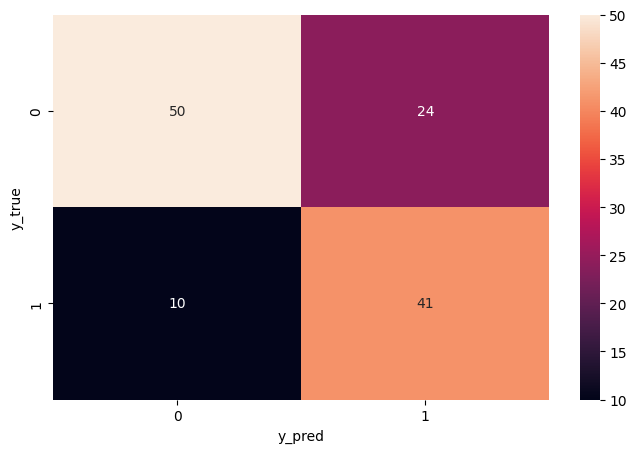

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [23]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        74
           1       0.63      0.80      0.71        51

    accuracy                           0.73       125
   macro avg       0.73      0.74      0.73       125
weighted avg       0.75      0.73      0.73       125

